### Christopher Miller
### Homework 2 - EECS495 - Chapter 3 Assignments
### Northwestern University - Fall 2018

Problems 3.11 through 3.14

#### Problem 3.11
Code up momentum accelerated gradient descent as described in Section 3.8.2 and repeat the experiments detailed in Example 3.20. Return a cost function history plot. Use the first quadratic from Example 3.17. 

Function to minimize: $g(\textbf w) = a + \textbf b^T \textbf w + \textbf w^T \textbf C \textbf w$

Where: $\mathbf C = \begin{bmatrix} 0.5 & 0 \\ 0 & 12\end{bmatrix}$

$\mathbf b = \begin{bmatrix} 0 \\ 0\end{bmatrix}$

$a = 0$

And minimization parameters are:

$\alpha = 10^{-1}$

$\mathbf{w}^0 = \begin{bmatrix} 10 \\ 1\end{bmatrix}$

For 25 descent steps 
Different momenta: $\beta \in \{0.2, 0.7\}$

Show cost function history plots for both momenta and discuss conclusions as shown in Example 3.20.

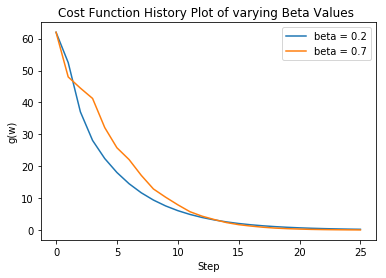

In [2]:
import autograd.numpy as np
import matplotlib.pyplot as plt
import autograd
from autograd import value_and_grad

#Define vars for g(w)
a = 0.0
b = np.array([0,0])
C = np.array([[0.5, 0],[0,12]])

#Define g
def g(w):
    return (a + np.dot(np.transpose(b),w)) + (np.dot(np.transpose(w),np.dot(C,w)))

#Reuse the gradient descent function from last week and modify 
#     modification is noted below *** like this ***

#Gradient Descent WITH ADDED MOMENTUM!!

def gradient_descent_mom(g,alpha_c,maxits, w, beta):
    #storage 
    w_hx = []
    cost_hx = []
    #zero alpha
    alpha = 0
    
    #Define the gradient function
    dg = value_and_grad(g)
    
    #define h vector that's of the same shape as w vector
    m = np.zeros((w.shape))
    #Again, use 1 to max_its+1. Easier.
    for k in range(1,maxits+1):
        #code for diminishing step len
        if alpha == 'dim':
            alpha = 1.0/k
        else:
            alpha = alpha_c
    
        #Evaluate the gradient and store
        cost_eval,grad_eval = dg(w)
        w_hx.append(w)
        cost_hx.append(cost_eval)
        
        #  *** MOMENTUM ***
        m = beta*m - (1-beta)*grad_eval

        #take the gradient step (note the sign change here!)
        w = w + alpha*m
    
    #Append final values
    w_hx.append(w)
    cost_hx.append(g(w))
    
    return w_hx, cost_hx

#Descent params: 

alpha = 10**(-1)
num_runs = 25
w_0 = np.array([10.0,1.0])

#Run with beta = 0.2
whx1, chx1 = gradient_descent_mom(g,alpha,num_runs,w_0,0.2)

#Run with beta = 0.7
whx2, chx2 = gradient_descent_mom(g,alpha,num_runs,w_0,0.7)

#Plot solutions
plt.plot(list(range(0,len(chx1),1)), chx1)
plt.plot(list(range(0,len(chx2),1)), chx2)
plt.xlabel('Step')
plt.ylabel('g(w)')
plt.legend(['beta = 0.2', 'beta = 0.7'])
plt.title('Cost Function History Plot of varying Beta Values ')
plt.show()

While both solutions converge to similar solutions (as shown in the cost function history plot above and the contour plots in Figure 3.21),the oscillatory behavior of the descent is still apparent in the above figure. As shown for $\beta = 0.7$, the "kink" around step 3 indicates the cost function is still decreasing but doesn't follow the path of least resistance - it bounces into a higher state. In other words, it oscillates on the way down. Minor oscillations are apparent for all of $\beta = 0.7$. $\beta = 0.2$ avoids these kinks by "filtering" out the oscillations - this $\beta$ value conserves the descent momentum while continuing to take steps forward placing most of the weight on the priors (direction) as opposed to the newest value found at the given timestep.

** The term filter is used loosely here but some could argue this is a form of low-pass filtering for those familar with DSP methods. 

#### Problem 3.12

Compare standard and fully normalized gradient descent in minimizing a function. Show a cost function history plot for both and note any differences. 

The function to minimize is: $g(w_0, w_1)=\tanh(4w_0+4w_1) + \max(1,0.4w_0^2)$

And minimization parameters are:

$\alpha = 10^{-1}$

$\mathbf{w}^0 = \begin{bmatrix} 2 \\ 2\end{bmatrix}$

For 1000 descent steps 


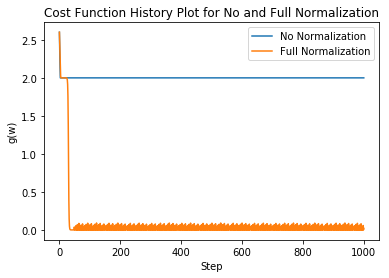

In [3]:
#Rely on imports from 3.11

#Define g
def g(w):
    return np.tanh(4*w[0]+4*w[1]) + max(1.0,0.4*w[0]**(2))
#Reuse the gradient descent function from last week and modify 
#     modification is noted below *** like this ***

#Normalized Gradient Descent

def gradient_descent_norm(g, alpha_c, maxits, w, ver):
    #storage 
    w_hx = []
    cost_hx = []
    #zero alpha
    alpha = 0
    
    #Define the gradient function
    dg = value_and_grad(g)
    
    #define h vector that's of the same shape as w vector
    m = np.zeros((w.shape))
    #Again, use 1 to max_its+1. Easier.
    for k in range(1,maxits+1):
        #code for diminishing step len
        if alpha == 'dim':
            alpha = 1.0/k
        else:
            alpha = alpha_c
    
        #Evaluate the gradient and store
        cost_eval,grad_eval = dg(w)
        w_hx.append(w)
        cost_hx.append(cost_eval)
        
        #  *** Normalization ***
        if ver == 'norm':
            norm = np.linalg.norm(grad_eval)
            #Watch for divide by zero (admittedly, this is Jeremy's code)
            if norm == 0:
                norm += 10**-6*np.sign(2*np.random.rand(1) - 1)
            grad_eval = grad_eval/norm
            
        #take the gradient step
        w = w - alpha*grad_eval
    
    #Append final values
    w_hx.append(w)
    cost_hx.append(g(w))
    
    return w_hx, cost_hx

#Descent params: 

alpha = 10**(-1)
num_runs = 1000
w_0 = np.array([2.0,2.0])

#Compute for both normalized and unnormalized methods

#None
normwhx1, normchx1 = gradient_descent_norm(g, alpha, num_runs, w_0, 'none')

#Full Normalization
normwhx2, normchx2 = gradient_descent_norm(g, alpha, num_runs, w_0, 'norm')

plt.plot(list(range(0,len(normchx1),1)), normchx1)
plt.plot(list(range(0,len(normchx2),1)), normchx2)
plt.xlabel('Step')
plt.ylabel('g(w)')
plt.legend(['No Normalization', 'Full Normalization'])
plt.title('Cost Function History Plot for No and Full Normalization')
plt.show()

Early on, both plots make similar progress, but the plot without normalization aproaches a local minima. The derivative is too small to make any further progress. The full normalization fixes this by dividing out the magnitude (small number) allowing the gradient descent algorithm to overcome this local optima and converge. The odd "noise" or "oscilaltor" behavior of full normalization is likely the result of machine precision with small numbers and unrelated to the algorithm

#### Problem 3.13

Compare component-wise and full normalized gradient descent repeating the experiment described in Ex 3.24. Provide cost function history plots for these. 

The function to minimize is: $g(w_0, w_1)=\max(0,\tanh(4w_0+w_1))+\max(0,|0.4w_0|)+1$

And minimization parameters are:

$\alpha = 10^{-1}$

$\mathbf{w}^0 = \begin{bmatrix} 2 \\ 2\end{bmatrix}$

For 1000 descent steps 

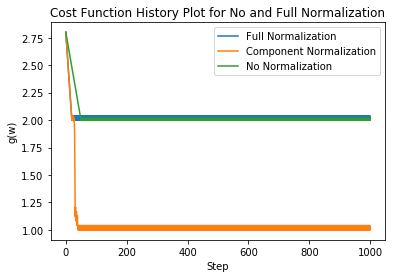

In [4]:
#Define g
def g(w):
    return max(0,np.tanh(4*w[0]+4*w[1])) + max(0,np.abs(0.4*w[0])) + 1.0
#Reuse the gradient descent function from last week and modify 
#     modification is noted below *** like this ***

#Normalized Gradient Descent - redux - override the old function

def gradient_descent_norm(g, alpha_c, maxits, w, ver):
    #storage 
    w_hx = []
    cost_hx = []
    #zero alpha
    alpha = 0
    
    #Define the gradient function
    dg = value_and_grad(g)
    
    #define h vector that's of the same shape as w vector
    m = np.zeros((w.shape))
    #Again, use 1 to max_its+1. Easier.
    for k in range(1,maxits+1):
        #code for diminishing step len
        if alpha == 'dim':
            alpha = 1.0/k
        else:
            alpha = alpha_c
    
        #Evaluate the gradient and store
        cost_eval,grad_eval = dg(w)
        w_hx.append(w)
        cost_hx.append(cost_eval)
        
        #  *** Normalization ***
        if ver == 'norm':
            norm = np.linalg.norm(grad_eval)
            #Watch for divide by zero (admittedly, this is Jeremy's code)
            if norm == 0:
                norm += 10**-6*np.sign(2*np.random.rand(1) - 1)
            grad_eval = grad_eval/norm
            
        #  *** Component-wise Normalization ***   
        if ver == 'comp':
            comp_norm = np.abs(grad_eval) + 10**(-8)
            grad_eval = grad_eval/comp_norm
            
        #take the gradient step
        w = w - alpha*grad_eval
    
    #Append final values
    w_hx.append(w)
    cost_hx.append(g(w))
    
    return w_hx, cost_hx

#Descent params: 

alpha = 10**(-1)
num_runs = 1000
w_0 = np.array([2.0,2.0])

#Compute for both normalized and unnormalized methods

#Full Normalization
normwhx1, normchx1 = gradient_descent_norm(g, alpha, num_runs, w_0, 'norm')

#Component-Wise Normalization
normwhx2, normchx2 = gradient_descent_norm(g, alpha, num_runs, w_0, 'comp')

#No normalization
normwhx3, normchx3 = gradient_descent_norm(g, alpha, num_runs, w_0, 'none')

plt.plot(list(range(0,len(normchx1),1)), normchx1)
plt.plot(list(range(0,len(normchx2),1)), normchx2)
plt.plot(list(range(0,len(normchx3),1)), normchx3)
plt.xlabel('Step')
plt.ylabel('g(w)')
plt.legend(['Full Normalization', 'Component Normalization', 'No Normalization'])
plt.title('Cost Function History Plot for No and Full Normalization')
plt.show()

The above plot shows the performance of full, component-wise, and no-normalization. No normalization performs the worst. Both Full normalization and no normalization are only able to converge upon a local minima (likely in the $w_0$ direction as $w_1$ is very flat). Component-wise normalization considers this and normalizes across across each component of $\mathbf w$ allowing for the descent to traverse the flat part of the $g(\mathbf w)$ in the $w_1$ direction and converge upon the global minima. 

#### Problem 3.14
Mini-batch gradient descent

Implement the mini-batch gradient descent scheme and repeat example 3.27. Create two cost function history plots and discuss the conclusions drawn from the plots. 

Function to minimize: $g(w) = \Sigma^P_{p = 1} g_p(w) = \Sigma^P_{p = 1} ( a_p +b_pw+c_pw^2)$

Where: $a_p$, $b_p$, and $c_p$ are randomly selected from a normal distribution with zero mean and unit standard deviation. Oh, and $\mathbf w = 0$

P = 100, $\alpha$ = 10^0, and we compute two epochs for batch sizes of 1 and 10. 

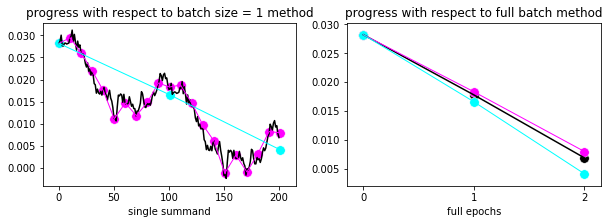

In [66]:
from autograd.misc.flatten import flatten_func

#For plotting only -- from Jeremy's Code --
def compare_runs(batch_cost_hist,minibatch_cost_hist,minibatch_cost_hist_2):
    # create figure and color pattern
    fig = plt.figure(figsize = (10,3))
    colors = ['k','magenta','aqua','blueviolet','chocolate']

    ### plot all with respect to smallest mini-batch size ###
    ax = plt.subplot(1,2,1)

    # count number of steps in different runs
    num_stoch = len(minibatch_cost_hist)
    num_mini = len(minibatch_cost_hist_2)
    num_full = len(batch_cost_hist)

    # plot stochastic
    ax.plot(minibatch_cost_hist, label='batch size = 1',c = colors[0],linewidth=1.5)

    # plot mini and full batch with respect to stochastic
    range_mini = np.linspace(0,num_stoch,num_mini)
    ax.plot(range_mini,minibatch_cost_hist_2, label='batch size = 10',c = colors[1],linewidth=1)
    ax.scatter(range_mini,minibatch_cost_hist_2,c=colors[1],s=90,edgecolor = 'w',linewidth=0.5)

    range_full = np.linspace(0,num_stoch,num_full)
    ax.plot(range_full,batch_cost_hist, label='full batch',c = colors[2],linewidth=1)
    ax.scatter(range_full,batch_cost_hist,c=colors[2],s=90,edgecolor = 'w',linewidth=0.5)

    # label panel
    ax.set_title('progress with respect to batch size = 1 method')
    ax.set_xlabel('single summand')
    #plt.legend(loc = 1)

    ### plot with respect to epoch number ###
    ax = plt.subplot(1,2,2)

    # plot stochastic batch
    inds_stoch = np.linspace(0,num_stoch,num_full)
    inds_stoch = [int(v) for v in inds_stoch]
    inds_stoch[-1]-=1
    plot_stoch = [minibatch_cost_hist[v] for v in inds_stoch]
    ax.plot(plot_stoch, label='batch size = 1',c = colors[0],linewidth=1.5)
    ax.scatter(np.arange(num_full),plot_stoch,c=colors[0],s=90,edgecolor = 'w',linewidth=0.5)

    # plot mini and full batch with respect to stochastic
    inds_mini = np.linspace(0,num_mini,num_full)
    inds_mini = [int(v) for v in inds_mini]
    inds_mini[-1]-=1
    plot_mini = [minibatch_cost_hist_2[v] for v in inds_mini]
    ax.plot(plot_mini, label='batch size = 10',c = colors[1],linewidth=1)
    ax.scatter(np.arange(num_full),plot_mini,c=colors[1],s=90,edgecolor = 'w',linewidth=0.5)

    # plot full cost
    ax.plot(batch_cost_hist, label='full batch',c = colors[2],linewidth=1)
    ax.scatter(np.arange(num_full),batch_cost_hist,c=colors[2],s=90,edgecolor = 'w',linewidth=0.5)
    ax.set_title('progress with respect to full batch method')
    ax.set_xticks(np.arange(num_full))
    ax.set_xlabel('full epochs')

    # plot all with respect to epoch number
    plt.show()

P = 100 #Number of quadratics in a function
    
##Define the function parameters ONCE
list_o_const = []
for i in range(P):
    a = np.random.randn(1,1)[0][0]
    b = np.random.randn(1,1)[0][0]
    C = np.random.randn(1,1)[0][0]
    list_o_const.append([a,b,C])

#Define the function, g
def g(w,iter):
    cost = 0
    for i in iter:
        const = list_o_const[int(i)]
        a = const[0]
        b = const[1]
        C = const[2]
        #Add up the cost for the iteration. Single input, not using matrix multiplication      
        cost = cost + (a + b*w + C*w*w)
    return cost / P

#Define Gradient Descent with MINI BATCHES

def gradient_descent_mini(g, alpha, max_epochs, w, num_train, batch_size):
    #flatten input function and make flat graidient
    g_flat, unflatten, w = flatten_func(g,w) #too bad this is 1 D
    grad = value_and_grad(g_flat)
    
    #History Record, yo yo
    w_hx = [unflatten(w)] #Grab dim of w_vec and init value
    c_hx = [g_flat(w,np.arange(num_train))] #grab dim of output of g flat and catch init value
    
    #Batches equal total dataset? 
    numbatch = int(np.ceil(np.divide(num_train, batch_size)))
    
    for k in range(max_epochs):
        #loop over each minibatch and zero training cost on each loop
        train_cost = 0
        for batch in range(numbatch):
            #indicies of the bath; min function to not cross max number of training sets
            #    they really do think of everything...
            batch_idxs = np.arange(batch*batch_size,min((batch+1)*batch_size, num_train))
            
            #plug value into function and get derivative
            cost_eval, grad_eval = grad(w,batch_idxs)
            grad_eval.shape = np.shape(w) #reshape the vector
            
            #Descent step
            w = w - alpha*grad_eval
            
            #Update training cost
            cost = g_flat(w,np.arange(num_train))
            
            #Record weight anc cost hx
            w_hx.append(unflatten(w))
            c_hx.append(cost)
            
    return w_hx, c_hx

#Runtime params
num_train = P
batch_size = P
alpha = 10**0
num_epochs = 2
w_0 = 0.0

#Run full batch
full_w_hx, full_c_hx = gradient_descent_mini(g,alpha,num_epochs,w_0,num_train,batch_size)

#Run with bath size 1
batch_size = 1
b1_w_hx, b1_c_hx = gradient_descent_mini(g,alpha,num_epochs,w_0,num_train,batch_size)

#Run with batch size 10
batch_size = 10
b10_w_hx, b10_c_hx = gradient_descent_mini(g,alpha,num_epochs,w_0,num_train,batch_size)

#Run Jeremy's Nice Function for Plotting MiniBatches
compare_runs(full_c_hx,b1_c_hx,b10_c_hx)